# Kalman Filter and how diffrent things actually work

## 1D Kalman

Lets assume that you want to measure 1 variable from 1 sensor. We are sure that the sensor gives us the measurements with mean μ and SD σ^2.

The reading of the sensor will look like this

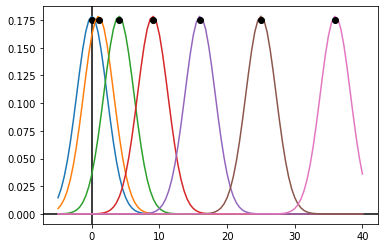

In [170]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math


x = np.linspace(-5, 40, 100)
variance = 5
plt.axvline(x=0, c="black", label="x=0")
plt.axhline(y=0, c="black", label="y=0")
for mu in range(7):
    sigma = math.sqrt(variance)
    plt.plot(x,stats.norm.pdf(x, mu*mu, sigma) )
    plt.plot(mu*mu ,0.175 , marker = "o" ,c = "black" )
plt.show()

When the variation is large , its very tough to get an accurate reading for what the value is,

For example lets take a simple y = x line

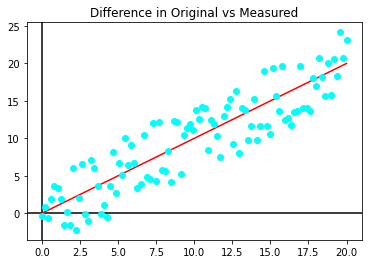

In [171]:
import random
x = np.linspace(0,20,100)
y = np.linspace(0,20,100)

plt.axvline(x=0, c="black", label="x=0")
plt.axhline(y=0, c="black", label="y=0")

plt.plot(x,y, c = "red")
plt.title("Difference in Original vs Measured")
variance = 5

for i in range(len(y)):
    y[i] += random.uniform(-variance, variance)
    
plt.plot(x,y , "o" , c="cyan")


Hence we like to use a filter to try and accurately asses the actual value from reading like this

## Now lets model a kalman filter to solve issues like this
 Lets assume this graph is for a car moving at a constant speed (1 m/s) and the readings are from the GPS sensor attached to the car 

We know $s(t) = s(t-∆𝑡) + u*∆𝑡$

assuming to acceleration takes place

u = 1m/s
$∆𝑡 = \frac{1}{5}$

we know that the variance in the sensor is 5

lets assume we are 99.5% confident in the initial reading and uncertanity in it is 0

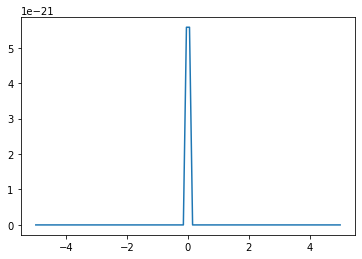

In [172]:
x = np.linspace(-5,5,100)
plt.plot(x,stats.norm.pdf(x, 0, 0.005))

Now we need to understand the very important maths concept which is multiplication of a gausian distribution with a scaler or a matrix

Lets assume the gausian curve to have a mean of 2 and variance of 2,
when we multiply it with a scaler quantity(k), 
the new mean is $k\mu$ and the new variance is $k^2\sigma^2$

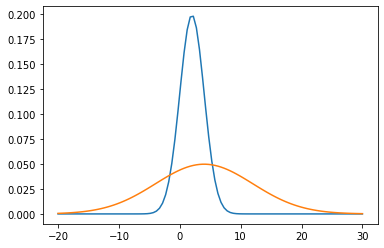

In [173]:
x = np.linspace(-20,30,100)
plt.plot(x,stats.norm.pdf(x, 2, 2))
plt.plot(x,stats.norm.pdf(x, 4, 8))

## Another important topic we need to know is adding of 2 gausian distributions



Now when we add 2 gausian distributions , 
we define the kalman gain as : $$k = \frac{\sigma0^2}{\sigma0^2 + \sigma1^2}$$
new mean as : 
$$\mu(new) = \mu0 + k{(\mu0 + \mu1)}$$
new variance as :
$$ \sigma^2 = \sigma0^2 - k\sigma0^2 $$

## Back to Kalman filters,
kalman filter have 3 steps , initialization , predict , update.

### 1. Initialize
        x = Initial guess of the system (dosent have to be accurate)
        variance (trust) of the initial reading (in this case we have kept it morderate)
        speed , etc = other variables used in modeling the state 
        

In [174]:
X = 0
variance= 1
speed = 1

## 2. Predict
    We use the state model to predict the new state with the help of the old state

In [175]:
def predict(X,speed,dt):
    return X + speed*dt

## 3. Update
    To understand the update step , we need to understand how it works,
    Step 1 :- We use the predict method to find the theoretical position relative to the previous output
        in this case , we add dt * speed to the position
    Step 2 :- We add the gausian curves of the readings and the prediction
    Step 3 :- We make return the new curve we got by adding the 2 curves
    Step 4 :- We update the current reading to be prev reading

In [176]:
def update(reading_mean,reading_variance ,current_x,current_variance , dt):
    prediction_mean = predict(current_x,speed,dt)
    k = current_variance/(current_variance + reading_variance)
    current_x = prediction_mean + k*(reading_mean - prediction_mean)
    current_variance = current_variance - (k*current_variance)
    return current_x , current_variance

#### Creating Sample input data

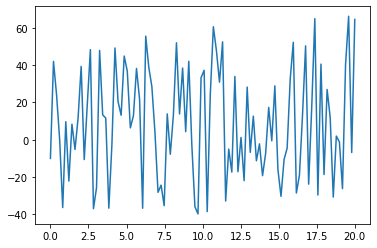

In [177]:
x = np.linspace(0,20,100)
y = np.linspace(0,20,100)

reading_variance = 50

for i in range(len(y)):
    y[i] += random.uniform(-reading_variance,reading_variance)

plt.plot(x,y)

### Calling update for reading and plotting the results

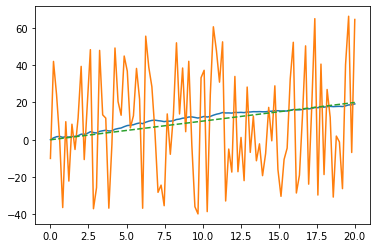

In [178]:
predicted_y = []
dt = 1/5
for i in range(len(y)):
    X , variance = update(y[i],reading_variance,X,variance,dt)
    predicted_y.append(X)    


plt.plot(x,predicted_y)
plt.plot(x,y)
plt.plot(x,x , linestyle = "dashed")

## Even for extremely inaccurate guesses , the kalman filter can predict the output really well

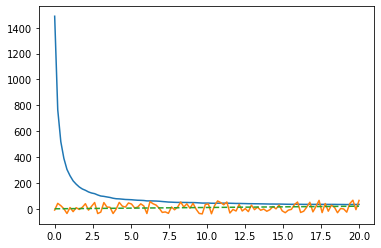

In [179]:
X = 3000000
variance= 99999
speed = 1


predicted_y = []
dt = 1/5
for i in range(len(y)):
    X , variance = update(y[i],reading_variance,X,variance,dt)
    predicted_y.append(X)    


plt.plot(x,predicted_y)
plt.plot(x,y)
plt.plot(x,x , linestyle = "dashed")